# **Model**

In [11]:
experiment_label = 'XX'

In [12]:
user_label = 'XX'

## **Aim**

Aim for this notebook

## **Findings**

Findings for this notebook

In [19]:
#Initial imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))
from src.common_lib import DataReader, NBARawData
from sklearn.svm import SVC

## **Data input and cleansing**

In [20]:
#Load dataset using common function DataReader.read_data()
data_reader = DataReader()
# Load Raw Train Data
df_train = data_reader.read_data(NBARawData.TRAIN)
# Load Test Raw Data
df_test = data_reader.read_data(NBARawData.TEST)

In [9]:
#For train dataframe, remove redundant column 'Id_old'
### Removing done in Data Split function
# cols_drop = ["Id", "Id_old"]
# df_train.drop(cols_drop, axis=1, inplace=True)

### Column Strip is already done in Data Reader for Train and Test set, so comment out
# df_train.columns = df_train.columns.str.strip()
df_train.describe

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,3799,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,3800,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,3801,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,3802,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,3803,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2996,11794,32,9.2,1.8,0.7,1.8,40.3,-0.1,-0.2,...,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,11679,11795,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,...,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,5537,11796,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,...,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,1292,11797,39,7.7,2.5,1.0,2.3,40.1,-0.3,-0.5,...,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


In [16]:
#For test dataframe, remove redundant column 'Id_old'
# df_test.drop(cols_drop, axis=1, inplace=True)
# df_test.columns = df_test.columns.str.strip()
# df_test.describe

<bound method NDFrame.describe of       GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  \
0     56   9.1   4.0  1.6   3.7  43.7      0.1  0.3   7.3  0.7  1.2  63.4   
1     43  19.3  10.1  3.7   8.1  46.0      0.6  1.7  35.1  1.8  2.5  75.3   
2     82  33.9  11.3  4.9  10.6  45.6      0.5  1.9  44.8  1.8  2.7  71.2   
3     86  44.7  18.8  6.8  15.9  42.9      0.5  1.8  13.5  4.5  6.3  70.9   
4     58  12.3   4.7  1.6   4.0  40.0      0.5  1.7  38.7  1.1  1.3  76.9   
...   ..   ...   ...  ...   ...   ...      ...  ...   ...  ...  ...   ...   
3794  84  21.2   8.7  3.4   6.7  50.2      0.0  0.0  -4.5  1.7  2.5  68.1   
3795  49  16.3   6.4  2.9   6.6  44.4     -0.1 -0.4  19.8  1.0  1.9  50.2   
3796  53   9.9   2.1  0.8   1.8  43.1     -0.4 -0.6   1.9  0.6  1.0  63.9   
3797  89  38.3  14.5  5.4  11.8  45.2      0.5  1.2  24.7  2.5  2.9  89.2   
3798  55  12.0   3.0  1.1   2.5  42.3      0.1  0.6  11.7  0.9  1.1  76.7   

      OREB  DREB  REB  AST  STL  BLK  TOV

## **Negative values in dataset**

In [11]:
print(df_train.where(df_train < 0).count())

Id_old            0
Id                0
GP                2
MIN               0
PTS               0
FGM               0
FGA               0
FG%               0
3P Made        1629
3PA            1658
3P%             878
FTM               0
FTA               0
FT%               1
OREB              0
DREB              0
REB               0
AST               0
STL               0
BLK            1048
TOV               0
TARGET_5Yrs       0
dtype: int64


In [12]:
# Negative values do not make sense in this context
#Define negative cleaning function
def clean_negatives(strategy, df):
    
    if strategy=='abs':
        df = abs(df)
    if strategy=='null':
        df[df < 0] = None
    if strategy=='mean':
        df[df < 0] = None
        df.fillna(df.mean(), inplace=True)      
    
    return(df)

In [13]:
#Clean negative numbers
negatives_strategy = 'abs'

df_train = clean_negatives(negatives_strategy, df_train)
df_test = clean_negatives(negatives_strategy, df_test)

## **Feature Correlation and Selection**

<AxesSubplot:>

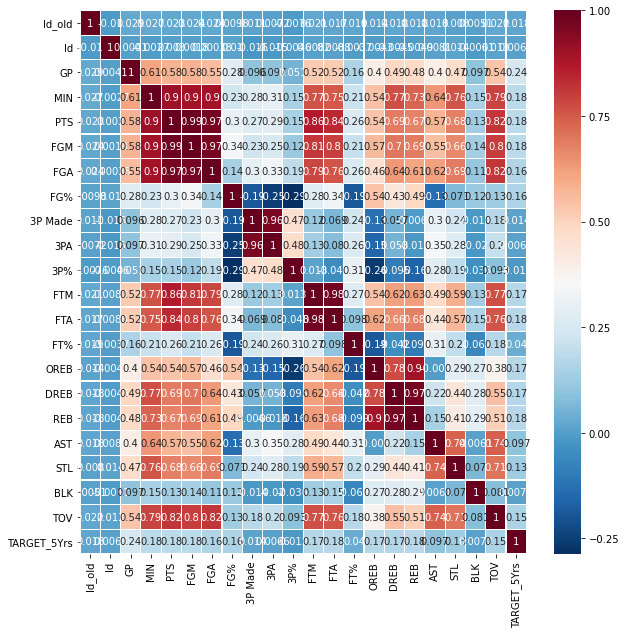

In [14]:
#Use Pearson Correlation to determine feature correlation 
pearsoncorr = df_train.corr('pearson')

#Create heatmap of pearson correlation factors
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.2)

In [10]:
#Drop correlated features w/ score over 0.9 - retain "MINS", "3P MADE","FTM","REB"
#selected_features = data_reader.select_feature_by_correlation(df_train)

##  **Standard Scaling** (Optional)

In [ ]:
#Standardise scaling of all feature values
df_train_selected  = df_train[selected_features]

#Apply scaler
df_cleaned = df_train_selected.copy()
target = df_cleaned.pop('TARGET_5Yrs')

df_train_scaled = data_reader.scale_features_by_standard_scaler(df_cleaned)
df_train_scaled

### Polynomial (Optional)


In [ ]:
X_train_poly = data_reader.polynomialize_data(X_train, 2)
X_val_poly = data_reader.polynomialize_data(X_val, 2)

### Data Splitting - Train

In [15]:
# Split the training dataset using common function data_reader.splitdata
X_train, X_val, y_train, y_val  = data_reader.split_data(df_train)
#X_train, X_val, y_train, y_val  = data_reader.split_data(df_train_scaled)

## **Model Selection and Training**

In [17]:
#Create Optimised Model
optmodel = SVC()

In [18]:
#Use GridSearchCV to optimise parameters
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3, scoring="roc_auc", n_jobs=-2) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


KeyboardInterrupt: 

In [ ]:
#Print the optimised parameters
print(grid.best_params_) 

In [48]:
#Create model with the optimised parameters
model = SVC(C=100, break_ties=False, class_weight='balanced', coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma=0.0001, kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)

In [49]:
model.fit(X_train, y_train)

In [50]:
#Store model in /models
from joblib import dump
dump(model, '../models/' + experiment_label + '.joblib')

['../models/XX.joblib']

## **Model Evaluation**

In [51]:
#Create predictions for train and validation
y_train_preds = model.predict(X_train)
y_val_preds = model.predict(X_val)

In [52]:
#Evaluate train predictions
#from src.models.aj_metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report
sys.path.append(os.path.abspath('..'))
from src.models.aj_metrics import confusion_matrix

In [53]:
y_train_preds

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [54]:
#Training performance results
print("ROC AUC Score:")
print(roc_auc_score(y_train,y_train_preds))
print(classification_report(y_train, y_train_preds)) 

ROC AUC Score:
0.6521960013454253
              precision    recall  f1-score   support

           0       0.26      0.70      0.38      1074
           1       0.91      0.60      0.73      5326

    accuracy                           0.62      6400
   macro avg       0.59      0.65      0.55      6400
weighted avg       0.80      0.62      0.67      6400



In [55]:
#Confusion matrix
print(confusion_matrix(y_train, y_train_preds))

        pred:0  pred:1
true:0     752     322
true:1    2108    3218


In [ ]:
#ROC Curve
plot_roc_curve(model,X_train, y_train)

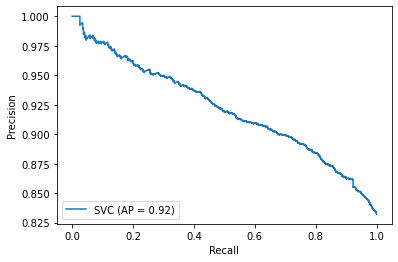

In [57]:
#Precision Recall Curve
plot_precision_recall_curve(model,X_train,y_train)

In [58]:
#Validation performance analysis
print("ROC AUC Score:")
print(roc_auc_score(y_val,y_val_preds))
print("Confusion Matrix:")
print(classification_report(y_val, y_val_preds)) 

ROC AUC Score:
0.6425709327221999
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.25      0.69      0.36       257
           1       0.91      0.60      0.72      1343

    accuracy                           0.61      1600
   macro avg       0.58      0.64      0.54      1600
weighted avg       0.80      0.61      0.66      1600



In [59]:
#Confusion matrix
print(confusion_matrix(y_train, y_train_preds))

        pred:0  pred:1
true:0     752     322
true:1    2108    3218


In [10]:
#ROC Curve
plot_roc_curve(model,X_val, y_val)

NameError: name 'plot_roc_curve' is not defined

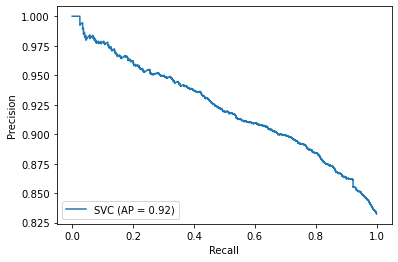

In [39]:
#Precision Recall Curve
plot_precision_recall_curve(model,X_train,y_train)

## **Test output**

In [61]:
#Output predictions
X_test = df_test
y_test_preds = model.predict_proba(X_test)[:,1]

In [62]:
y_test_preds

array([0.78009774, 0.78253626, 0.93375071, ..., 0.76066359, 0.92538668,
       0.79180069])

In [63]:
output = pd.DataFrame({'Id': range(0,3799), 'TARGET_5Yrs': [p for p in y_test_preds]})

In [64]:
output.to_csv("../reports/" + user_label + "_" + experiment_label + ".csv", index=False)

## **Outcome**

After outputting the predictions into kaggle, the final score was 0.00